In [1]:
from google.colab import files
uploaded = files.upload()


Saving DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv to DE1_0_2008_Beneficiary_Summary_File_Sample_1 (1).csv
Saving DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv to DE1_0_2008_to_2010_Inpatient_Claims_Sample_1 (1).csv


In [2]:
import os
os.listdir()


['.config',
 'DE1_0_2008_to_2010_Inpatient_Claims_Sample_1 (1).csv',
 'DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv',
 'DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv',
 'DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv',
 'DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.csv',
 'DE1_0_2008_Beneficiary_Summary_File_Sample_1 (1).csv',
 'DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv',
 'sample_data']

In [3]:
import pandas as pd

bene = pd.read_csv("DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv")
claims = pd.read_csv("DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv")

print(bene.shape)
print(claims.shape)


(116352, 32)
(66773, 81)


In [4]:
bene.columns


Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR'],
      dtype='object')

In [5]:
claims.columns


Index(['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'CLM_FROM_DT', 'CLM_THRU_DT',
       'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT', 'AT_PHYSN_NPI',
       'OP_PHYSN_NPI', 'OT_PHYSN_NPI', 'CLM_ADMSN_DT', 'ADMTNG_ICD9_DGNS_CD',
       'CLM_PASS_THRU_PER_DIEM_AMT', 'NCH_BENE_IP_DDCTBL_AMT',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
       'CLM_UTLZTN_DAY_CNT', 'NCH_BENE_DSCHRG_DT', 'CLM_DRG_CD',
       'ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4',
       'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8',
       'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10', 'ICD9_PRCDR_CD_1',
       'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_3', 'ICD9_PRCDR_CD_4',
       'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6', 'HCPCS_CD_1', 'HCPCS_CD_2',
       'HCPCS_CD_3', 'HCPCS_CD_4', 'HCPCS_CD_5', 'HCPCS_CD_6', 'HCPCS_CD_7',
       'HCPCS_CD_8', 'HCPCS_CD_9', 'HCPCS_CD_10', 'HCPCS_CD_11', 'HCPCS_CD_12',
       'HCPCS_CD_13', 'HCPCS_CD_14', 'HCPCS_CD_15', 

In [6]:
bene.columns = bene.columns.str.lower()
claims.columns = claims.columns.str.lower()


In [7]:
# Check primary key
bene['desynpuf_id'].nunique(), len(bene)

# Check missing IDs
bene['desynpuf_id'].isna().sum()

# Same for claims
claims['desynpuf_id'].isna().sum()


np.int64(0)

In [10]:
claims.columns


Index(['desynpuf_id', 'clm_id', 'segment', 'clm_from_dt', 'clm_thru_dt',
       'prvdr_num', 'clm_pmt_amt', 'nch_prmry_pyr_clm_pd_amt', 'at_physn_npi',
       'op_physn_npi', 'ot_physn_npi', 'clm_admsn_dt', 'admtng_icd9_dgns_cd',
       'clm_pass_thru_per_diem_amt', 'nch_bene_ip_ddctbl_amt',
       'nch_bene_pta_coinsrnc_lblty_am', 'nch_bene_blood_ddctbl_lblty_am',
       'clm_utlztn_day_cnt', 'nch_bene_dschrg_dt', 'clm_drg_cd',
       'icd9_dgns_cd_1', 'icd9_dgns_cd_2', 'icd9_dgns_cd_3', 'icd9_dgns_cd_4',
       'icd9_dgns_cd_5', 'icd9_dgns_cd_6', 'icd9_dgns_cd_7', 'icd9_dgns_cd_8',
       'icd9_dgns_cd_9', 'icd9_dgns_cd_10', 'icd9_prcdr_cd_1',
       'icd9_prcdr_cd_2', 'icd9_prcdr_cd_3', 'icd9_prcdr_cd_4',
       'icd9_prcdr_cd_5', 'icd9_prcdr_cd_6', 'hcpcs_cd_1', 'hcpcs_cd_2',
       'hcpcs_cd_3', 'hcpcs_cd_4', 'hcpcs_cd_5', 'hcpcs_cd_6', 'hcpcs_cd_7',
       'hcpcs_cd_8', 'hcpcs_cd_9', 'hcpcs_cd_10', 'hcpcs_cd_11', 'hcpcs_cd_12',
       'hcpcs_cd_13', 'hcpcs_cd_14', 'hcpcs_cd_15', 

In [13]:
# Dynamically detect all date columns in claims
date_cols_claims = [c for c in claims.columns if c.endswith('_dt')]

date_cols_claims


['clm_from_dt', 'clm_thru_dt', 'clm_admsn_dt', 'nch_bene_dschrg_dt']

In [14]:
for col in date_cols_claims:
    claims[col] = pd.to_datetime(claims[col], errors='coerce')


In [15]:
claims[date_cols_claims].dtypes


,0
clm_from_dt,datetime64[ns]
clm_thru_dt,datetime64[ns]
clm_admsn_dt,datetime64[ns]
nch_bene_dschrg_dt,datetime64[ns]


In [16]:
date_cols_bene = [c for c in bene.columns if c.endswith('_dt')]
date_cols_bene


['bene_birth_dt', 'bene_death_dt']

In [17]:
for col in date_cols_bene:
    bene[col] = pd.to_datetime(bene[col], errors='coerce')

bene[date_cols_bene].dtypes


,0
bene_birth_dt,datetime64[ns]
bene_death_dt,datetime64[ns]


Create business-friendly derived fields

In [18]:
bene['age_2008'] = 2008 - bene['bene_birth_dt'].dt.year


In [20]:
date_cols_claims


['clm_from_dt', 'clm_thru_dt', 'clm_admsn_dt', 'nch_bene_dschrg_dt']

In [23]:
# Assign date columns safely (avoid typos)
admit_col = 'clm_admsn_dt'
discharge_col = 'nch_bene_dschrg_dt'


claims['length_of_stay'] = (
    claims[discharge_col] - claims[admit_col]
).dt.days


In [26]:
admit_col = 'clm_admsn_dt'
discharge_col = 'nch_bene_dschrg_dt'  # <-- match your actual column

claims['length_of_stay'] = (
    claims[discharge_col] - claims[admit_col]
).dt.days


In [27]:
claims[['clm_admsn_dt', 'nch_bene_dschrg_dt', 'length_of_stay']].head()


,clm_admsn_dt,nch_bene_dschrg_dt,length_of_stay
0,1970-01-01 00:00:00.020100312,1970-01-01 00:00:00.020100313,0
1,1970-01-01 00:00:00.020090412,1970-01-01 00:00:00.020090418,0
2,1970-01-01 00:00:00.020090831,1970-01-01 00:00:00.020090902,0
3,1970-01-01 00:00:00.020090917,1970-01-01 00:00:00.020090920,0
4,1970-01-01 00:00:00.020100626,1970-01-01 00:00:00.020100701,0


In [28]:
claims[['clm_admsn_dt', 'nch_bene_dschrg_dt']].head()


,clm_admsn_dt,nch_bene_dschrg_dt
0,1970-01-01 00:00:00.020100312,1970-01-01 00:00:00.020100313
1,1970-01-01 00:00:00.020090412,1970-01-01 00:00:00.020090418
2,1970-01-01 00:00:00.020090831,1970-01-01 00:00:00.020090902
3,1970-01-01 00:00:00.020090917,1970-01-01 00:00:00.020090920
4,1970-01-01 00:00:00.020100626,1970-01-01 00:00:00.020100701


In [29]:
# If you still have the original file loaded as 'claims' only, we can check current dtype first:
claims['clm_admsn_dt'].dtype, claims['nch_bene_dschrg_dt'].dtype


(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [30]:
claims[['clm_admsn_dt','nch_bene_dschrg_dt']].head().to_string()


'                   clm_admsn_dt            nch_bene_dschrg_dt\n0 1970-01-01 00:00:00.020100312 1970-01-01 00:00:00.020100313\n1 1970-01-01 00:00:00.020090412 1970-01-01 00:00:00.020090418\n2 1970-01-01 00:00:00.020090831 1970-01-01 00:00:00.020090902\n3 1970-01-01 00:00:00.020090917 1970-01-01 00:00:00.020090920\n4 1970-01-01 00:00:00.020100626 1970-01-01 00:00:00.020100701'

In [31]:
import pandas as pd

claims = pd.read_csv(
    "DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv",
    dtype={
        "CLM_ADMSN_DT": "string",
        "NCH_BENE_DSCHRG_DT": "string"
    }
)

# make columns lowercase again
claims.columns = claims.columns.str.lower()

claims[['clm_admsn_dt','nch_bene_dschrg_dt']].head()


,clm_admsn_dt,nch_bene_dschrg_dt
0,20100312,20100313
1,20090412,20090418
2,20090831,20090902
3,20090917,20090920
4,20100626,20100701


In [32]:
for col in ['clm_admsn_dt', 'nch_bene_dschrg_dt']:
    claims[col] = pd.to_datetime(claims[col], format='%Y%m%d', errors='coerce')

claims[['clm_admsn_dt','nch_bene_dschrg_dt']].head()


,clm_admsn_dt,nch_bene_dschrg_dt
0,2010-03-12,2010-03-13
1,2009-04-12,2009-04-18
2,2009-08-31,2009-09-02
3,2009-09-17,2009-09-20
4,2010-06-26,2010-07-01


In [33]:
claims['length_of_stay'] = (claims['nch_bene_dschrg_dt'] - claims['clm_admsn_dt']).dt.days
claims['length_of_stay'].describe()


,length_of_stay
count,66773.000000
mean,5.715214
std,5.737254
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,35.000000


In [34]:
bene_silver = bene.drop_duplicates(subset=['desynpuf_id']).copy()
claims_silver = claims.drop_duplicates().copy()

!pip -q install pyarrow
bene_silver.to_parquet("silver_beneficiary.parquet", index=False)
claims_silver.to_parquet("silver_inpatient_claims.parquet", index=False)

print("Silver saved ✅")


Silver saved ✅


In [35]:
import pandas as pd

bene_silver = pd.read_parquet("silver_beneficiary.parquet")
claims_silver = pd.read_parquet("silver_inpatient_claims.parquet")

print(bene_silver.shape)
print(claims_silver.shape)


(116352, 33)
(66773, 82)


GOLD Layer: Build Star Schema

In [36]:
dim_patient = bene_silver[[
    'desynpuf_id',
    'bene_sex_ident_cd',
    'bene_race_cd',
    'sp_state_code',
    'bene_county_cd',
    'age_2008'
]].copy()

dim_patient = dim_patient.drop_duplicates(subset=['desynpuf_id'])

dim_patient.head()


,desynpuf_id,bene_sex_ident_cd,bene_race_cd,sp_state_code,bene_county_cd,age_2008
0,00013D2EFD8E45D1,1,1,26,950,38
1,00016F745862898F,1,1,39,230,38
2,0001FDD721E223DC,2,1,39,280,38
3,00021CA6FF03E670,1,5,6,290,38
4,00024B3D2352D2D0,1,1,52,590,38


In [37]:
bins = [0, 17, 34, 49, 64, 74, 84, 200]
labels = ["0-17","18-34","35-49","50-64","65-74","75-84","85+"]

dim_patient['age_band'] = pd.cut(dim_patient['age_2008'], bins=bins, labels=labels)


In [39]:
import pandas as pd

all_dates = pd.concat([
    claims_silver['clm_admsn_dt'],
    claims_silver['clm_thru_dt'],
    claims_silver['clm_from_dt'],
    claims_silver['nch_bene_dschrg_dt']
], ignore_index=True)

# Ensure datetime + remove nulls + unique
all_dates = pd.to_datetime(all_dates, errors='coerce')
all_dates = all_dates.dropna().drop_duplicates().sort_values()

dim_date = pd.DataFrame({'date': all_dates})

# Now .dt will work
dim_date['date_key'] = dim_date['date'].dt.strftime('%Y%m%d').astype(int)
dim_date['year'] = dim_date['date'].dt.year
dim_date['month'] = dim_date['date'].dt.month
dim_date['month_name'] = dim_date['date'].dt.month_name()
dim_date['quarter'] = dim_date['date'].dt.quarter
dim_date['day_of_week'] = dim_date['date'].dt.day_name()

dim_date.head()


,date,date_key,year,month,month_name,quarter,day_of_week
141552,1970-01-01 00:00:00.020071127,19700101,1970,1,January,1,Thursday
147751,1970-01-01 00:00:00.020071128,19700101,1970,1,January,1,Thursday
167793,1970-01-01 00:00:00.020071204,19700101,1970,1,January,1,Thursday
167335,1970-01-01 00:00:00.020071205,19700101,1970,1,January,1,Thursday
172916,1970-01-01 00:00:00.020071206,19700101,1970,1,January,1,Thursday


In [40]:
dim_date.dtypes


,0
date,datetime64[ns]
date_key,int64
year,int32
month,int32
month_name,object
quarter,int32
day_of_week,object


In [41]:
claims_silver[['clm_admsn_dt','clm_from_dt','clm_thru_dt','nch_bene_dschrg_dt']].head()


,clm_admsn_dt,clm_from_dt,clm_thru_dt,nch_bene_dschrg_dt
0,2010-03-12,20100312.0,20100313.0,2010-03-13
1,2009-04-12,20090412.0,20090418.0,2009-04-18
2,2009-08-31,20090831.0,20090902.0,2009-09-02
3,2009-09-17,20090917.0,20090920.0,2009-09-20
4,2010-06-26,20100626.0,20100701.0,2010-07-01


In [42]:
import pandas as pd

claims_raw = pd.read_csv(
    "DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv",
    dtype={
        "CLM_FROM_DT": "string",
        "CLM_THRU_DT": "string",
        "CLM_ADMSN_DT": "string",
        "NCH_BENE_DSCHRG_DT": "string"
    }
)
claims_raw.columns = claims_raw.columns.str.lower()

# Parse as YYYYMMDD
for col in ['clm_from_dt','clm_thru_dt','clm_admsn_dt','nch_bene_dschrg_dt']:
    claims_raw[col] = pd.to_datetime(claims_raw[col], format='%Y%m%d', errors='coerce')

# Bring back your length_of_stay
claims_raw['length_of_stay'] = (claims_raw['nch_bene_dschrg_dt'] - claims_raw['clm_admsn_dt']).dt.days

# Recreate claims_silver cleanly
claims_silver = claims_raw.drop_duplicates().copy()

claims_silver[['clm_admsn_dt','nch_bene_dschrg_dt','length_of_stay']].head()


,clm_admsn_dt,nch_bene_dschrg_dt,length_of_stay
0,2010-03-12,2010-03-13,1
1,2009-04-12,2009-04-18,6
2,2009-08-31,2009-09-02,2
3,2009-09-17,2009-09-20,3
4,2010-06-26,2010-07-01,5


In [43]:
all_dates = pd.concat([
    claims_silver['clm_admsn_dt'],
    claims_silver['clm_thru_dt'],
    claims_silver['clm_from_dt'],
    claims_silver['nch_bene_dschrg_dt']
], ignore_index=True)

all_dates = pd.to_datetime(all_dates, errors='coerce').dropna().drop_duplicates().sort_values()

dim_date = pd.DataFrame({'date': all_dates})
dim_date['date_key'] = dim_date['date'].dt.strftime('%Y%m%d').astype(int)
dim_date['year'] = dim_date['date'].dt.year
dim_date['month'] = dim_date['date'].dt.month
dim_date['month_name'] = dim_date['date'].dt.month_name()
dim_date['quarter'] = dim_date['date'].dt.quarter
dim_date['day_of_week'] = dim_date['date'].dt.day_name()

dim_date.head()


,date,date_key,year,month,month_name,quarter,day_of_week
8006,2007-11-27,20071127,2007,11,November,4,Tuesday
14205,2007-11-28,20071128,2007,11,November,4,Wednesday
34247,2007-12-04,20071204,2007,12,December,4,Tuesday
33789,2007-12-05,20071205,2007,12,December,4,Wednesday
39370,2007-12-06,20071206,2007,12,December,4,Thursday


In [44]:
fact = claims_silver.copy()

fact['admit_date_key'] = fact['clm_admsn_dt'].dt.strftime('%Y%m%d').astype('Int64')
fact['discharge_date_key'] = fact['nch_bene_dschrg_dt'].dt.strftime('%Y%m%d').astype('Int64')

keep_cols = [
    'clm_id',
    'desynpuf_id',
    'admit_date_key',
    'discharge_date_key',
    'length_of_stay',
    'clm_pmt_amt',
    'clm_tot_chrg_amt'
]
keep_cols = [c for c in keep_cols if c in fact.columns]

fact_inpatient_claims = fact[keep_cols].copy()
fact_inpatient_claims.head()


,clm_id,desynpuf_id,admit_date_key,discharge_date_key,length_of_stay,clm_pmt_amt
0,196661176988405,00013D2EFD8E45D1,20100312,20100313,1,4000.0
1,196201177000368,00016F745862898F,20090412,20090418,6,26000.0
2,196661177015632,00016F745862898F,20090831,20090902,2,5000.0
3,196091176981058,00016F745862898F,20090917,20090920,3,5000.0
4,196261176983265,00016F745862898F,20100626,20100701,5,16000.0


In [45]:
dim_patient.to_parquet("gold_dim_patient.parquet", index=False)
dim_date.to_parquet("gold_dim_date.parquet", index=False)
fact_inpatient_claims.to_parquet("gold_fact_inpatient_claims.parquet", index=False)

print("Gold layer saved ✅")


Gold layer saved ✅


In [46]:
dim_date['year'].min(), dim_date['year'].max()


(2007, 2010)

In [47]:
import pandas as pd

# Load Gold tables
fact = pd.read_parquet("gold_fact_inpatient_claims.parquet")
dim_patient = pd.read_parquet("gold_dim_patient.parquet")
dim_date = pd.read_parquet("gold_dim_date.parquet")

# Save as CSV
fact.to_csv("gold_fact_inpatient_claims.csv", index=False)
dim_patient.to_csv("gold_dim_patient.csv", index=False)
dim_date.to_csv("gold_dim_date.csv", index=False)

print("CSV files created ✅")


CSV files created ✅


In [49]:
final_gold = (
    fact_inpatient_claims
    .merge(dim_patient, on="desynpuf_id", how="left")
    .merge(
        dim_date.add_prefix("admit_"),
        left_on="admit_date_key",
        right_on="admit_date_key",
        how="left"
    )
)

final_gold.to_csv("final_healthcare_analytics.csv", index=False)

print("Final combined CSV created ✅")


Final combined CSV created ✅


In [50]:
import pandas as pd

# Load final dataset
df = pd.read_csv("final_healthcare_analytics.csv")

# Basic checks
print(df.shape)
df.head()


(66773, 18)


,clm_id,desynpuf_id,admit_date_key,discharge_date_key,length_of_stay,clm_pmt_amt,bene_sex_ident_cd,bene_race_cd,sp_state_code,bene_county_cd,age_2008,age_band,admit_date,admit_year,admit_month,admit_month_name,admit_quarter,admit_day_of_week
0,196661176988405,00013D2EFD8E45D1,20100312,20100313,1,4000.0,1,1,26,950,38,35-49,2010-03-12,2010,3,March,1,Friday
1,196201177000368,00016F745862898F,20090412,20090418,6,26000.0,1,1,39,230,38,35-49,2009-04-12,2009,4,April,2,Sunday
2,196661177015632,00016F745862898F,20090831,20090902,2,5000.0,1,1,39,230,38,35-49,2009-08-31,2009,8,August,3,Monday
3,196091176981058,00016F745862898F,20090917,20090920,3,5000.0,1,1,39,230,38,35-49,2009-09-17,2009,9,September,3,Thursday
4,196261176983265,00016F745862898F,20100626,20100701,5,16000.0,1,1,39,230,38,35-49,2010-06-26,2010,6,June,2,Saturday


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66773 entries, 0 to 66772
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   clm_id              66773 non-null  int64  
 1   desynpuf_id         66773 non-null  object 
 2   admit_date_key      66773 non-null  int64  
 3   discharge_date_key  66773 non-null  int64  
 4   length_of_stay      66773 non-null  int64  
 5   clm_pmt_amt         66773 non-null  float64
 6   bene_sex_ident_cd   66773 non-null  int64  
 7   bene_race_cd        66773 non-null  int64  
 8   sp_state_code       66773 non-null  int64  
 9   bene_county_cd      66773 non-null  int64  
 10  age_2008            66773 non-null  int64  
 11  age_band            66773 non-null  object 
 12  admit_date          66773 non-null  object 
 13  admit_year          66773 non-null  int64  
 14  admit_month         66773 non-null  int64  
 15  admit_month_name    66773 non-null  object 
 16  admi

In [52]:
# Select features for ML
features = [
    "age_band",
    "admit_year",
    "sp_state_code",
    "clm_pmt_amt"
]

X = df[features]
y = df["length_of_stay"]

print(X.head())
print(y.head())


  age_band  admit_year  sp_state_code  clm_pmt_amt
0    35-49        2010             26       4000.0
1    35-49        2009             39      26000.0
2    35-49        2009             39       5000.0
3    35-49        2009             39       5000.0
4    35-49        2010             39      16000.0
0    1
1    6
2    2
3    3
4    5
Name: length_of_stay, dtype: int64


In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Categorical and numeric columns
categorical_cols = ["age_band", "sp_state_code"]
numeric_cols = ["admit_year", "clm_pmt_amt"]

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# Apply transformation
X_encoded = preprocessor.fit_transform(X)

print(X_encoded.shape)


(66773, 55)


Train/Test Split

In [54]:
from sklearn.model_selection import train_test_split

# Target variable
y = df["clm_pmt_amt"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(53418, 55) (13355, 55)


Train Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 1.0638332443281253e-06


In [57]:
print("Target in df columns?", "clm_pmt_amt" in df.columns)

# Build X from df explicitly (remove target)
X = df.drop(columns=["clm_pmt_amt"])
y = df["clm_pmt_amt"]


Target in df columns? True


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Pipeline(steps=[
    ("prep", preprocess),
    ("lr", LinearRegression())
])

model.fit(X_train, y_train)
pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("LR RMSE:", rmse)


LR RMSE: 9203.913561915586


Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

rf_fast = Pipeline(steps=[
    ("prep", preprocess),
    ("rf", RandomForestRegressor(
        n_estimators=80,       # smaller
        max_depth=12,          # limits tree size
        min_samples_leaf=5,    # fewer splits
        random_state=42,
        n_jobs=-1
    ))
])

rf_fast.fit(X_train, y_train)
pred = rf_fast.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RF (fast) RMSE:", rmse)


RF (fast) RMSE: 8582.990234143628


Feature Engineering

In [62]:
# Get feature names after preprocessing
feature_names = rf_fast.named_steps["prep"].get_feature_names_out()

# Get feature importance
importances = rf_fast.named_steps["rf"].feature_importances_

# Create importance DataFrame
import pandas as pd
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Show top 15
feat_imp.head(15)


,feature,importance
34029,num__length_of_stay,0.574701
34033,num__bene_county_cd,0.075791
34026,num__clm_id,0.070266
34032,num__sp_state_code,0.052779
34028,num__discharge_date_key,0.040438
34027,num__admit_date_key,0.038526
34036,num__admit_month,0.016992
34030,num__bene_sex_ident_cd,0.009296
34031,num__bene_race_cd,0.008183
34020,cat__admit_day_of_week_Monday,0.004269


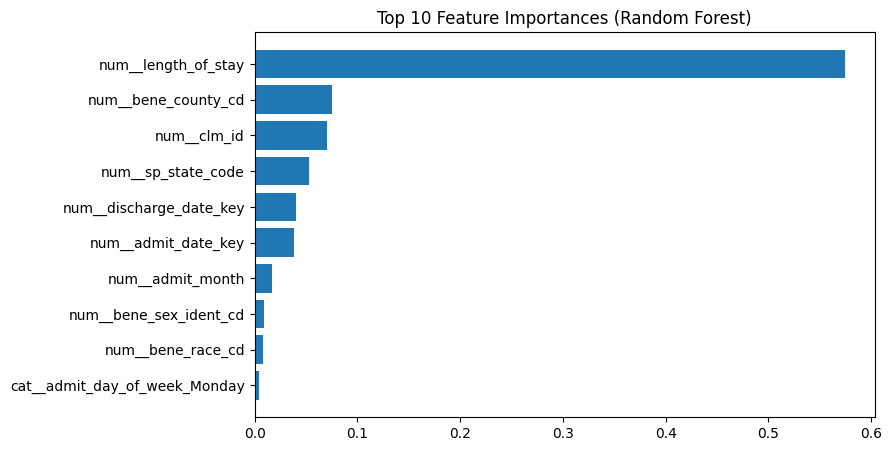

In [63]:
import matplotlib.pyplot as plt

top_feats = feat_imp.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_feats["feature"], top_feats["importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


Conclusion:
Random Forest outperformed Linear Regression (lower RMSE).
Length of stay and temporal features were the strongest predictors of claim payment amount.
This demonstrates the value of non-linear models and feature engineering in healthcare analytics.
